In [6]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [7]:
domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']
metric = "AUPRC"

# dir_path = "../results/DGAD/method5/1"
dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/DGAD/method5/3'
dir_path = "../results/DGAD/method6_tau"
# dir_path = '../results/DGAD/method5/3'
# dir_path = '../results/DGAD/method5_reg_lambda'
# dir_path = '../results/DGAD/method8'
dir_path = '../results/DGAD/method6_lambda'
# dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method7'
# dir_path = '../results/DGAD/method7_tau_lambda'

dir_path = '../results/DGAD/method6_revision'
dir_path = '../results/DGAD/method5/3'
dir_path = '../results/DGAD/method5_aug/3'
dir_path = '../results/DGAD/method5_reg_lambda'
dir_path = '../results/DGAD/method10'
dir_path = '../results/DGAD/method9_beta_list'
dir_path = '../results/DGAD/method10_prototype_norm'
dir_path = '../results/DGAD/method9'
dir_path = '../results/DGAD/method9_revision'
dir_path = '../results/DGAD/method9_kmeans'
dir_path = '../results/devnet/one_source_domain'
dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method6_lambda'
dir_path = '../results/DGAD/method6_revision'
# dir_path = '../results/DGAD/VAE_DEVNET'
# dir_path = '../results/DGAD/method6_2devnet'
# dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/devnet/3domain'
dir_path = '../results/DGAD/method12'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/method14'
# dir_path = '../old_results/DGAD/method6_lambda'
# dir_path = '../results/DGAD/method13_lambda'
dir_path = '../results/DGAD/VAE_LPIPS'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'
# dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/V_L_D'
dir_path = '../results/DGAD/20240908V_L_D'

dir_path = '../results/devnet/3domain'
# dir_path = '../old_results/devnet/many_versus_many'
# dir_path = '../results/devnet/20240915'
dir_path = '../results/DGAD/latent_dim_DGAD'

dir_path = '../results/DGAD/latent_dim_devnet'

# dir_path = '../results/DGAD/latent_dim_DGAD_lambda'


dir_path = '../results/devnet/20240915'

# dir_path = '../results/DGAD/method13_lambda'

dir_path = '../results/DGAD/latent_dim_CVAE_Unet'
dir_path = '../results/DGAD/latent_dim_CVAE_Unet'

dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'

# dir_path = '../results/DGAD/20240908V_L_D'
dir_path = '../results/DGAD/CVAE_DEVNET_rec_N'

dir_path = '../results/DGAD/method16'
# dir_path = '../results/devnet/20240915'
# dir_path = '../results/DGAD/method16_lambda'
dir_path = '../results/DGAD/method16_contamination'
# dir_path = '../results/devnet/PACS_contamination'

# dir_path = '../results/DGAD/method16_contamination_lambda'
dir_path = '../results/DGAD_2/VAE_LPIPS_DEVNET_method1'
dir_path = '../results/DGAD_2/VAE_LPIPS_DEVNET_method1_learn_all'

In [8]:
import itertools
# normal_class=["0", "1", "2", "3", "4", "5", "6"]
# normal_class=["0 1 2 3", "4 5 6", "0 2 4 6", "1 3 5", "0", "1", "2", "3", "4", "5", "6"]
# anomaly_class=["4 5 6", "0 1 2 3", "1 3 5", "0 2 4 6", "1 2 3 4 5 6", "0 2 3 4 5 6", "0 1 3 4 5 6", "0 1 2 4 5 6", "0 1 2 3 5 6", "0 1 2 3 4 6", "0 1 2 3 4 5"]
# epochs_list=[5, 10, 15, 20, 30]
# lr_list=[0.01, 0.001, 0.0005, 0.0002, 0.00005, 0.00001]
reg_lambda=[1,2,5,10]
NCE_lambda=[1,2,5,10]
PL_lambda=[1,2,5,10]
# cnt=[0,1,2,3,4]
cnt=[0]
all_para_list = list(itertools.product(reg_lambda, NCE_lambda, PL_lambda, cnt))
print(len(all_para_list))
all_para_list[0]

64


(1, 1, 1, 0)

In [9]:
ans = []
# para_name_list=["normal_class", "anomaly_class", "pre_lr", "pre_epochs", "lr", "epochs", "cnt"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2"]
para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "reg_lambda", "BalancedBatchSampler"]
if dir_path.__contains__("lambda"):
    para_name_list += ["reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]
if dir_path.__contains__("contamination"):
    para_name_list += ["contamination_rate"]
if dir_path.__contains__("VAE"):
    para_name_list += ["rec_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "rec_lambda",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt","reg_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2", "reg_lambda", "NCE_lambda", "PL_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "origin_svdd_lambda", "class_svdd_lambda", "align_lambda", "beta"]
print(len(os.listdir(dir_path)))
for file_name in os.listdir(dir_path):
    record = []
    data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
    max_epoch = data["val_max_metric"].item()["epoch"]
    # max_epoch = [i for i, val in enumerate(data[f"val_{metric}_list"]) if (val == max(data[f"val_{metric}_list"]))][-1]
    
    for key in para_name_list:
        if key in data["args"].item():
            record.append(data["args"].item()[key])
        else:
            record.append(None)
    
    record.append(max_epoch)

    if "metric" in data["val_max_metric"].item():
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUROC"])
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUPRC"])
    else:
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUROC"])
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUPRC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUROC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUPRC"])

    record.append(file_name)
    ans.append(record)

ans = pd.DataFrame(ans,columns=para_name_list + ["max_val_epoch"] +\
             [f'{item}_AUROC' for item in domain_list] + \
                [f'{item}_AUPRC' for item in domain_list] +\
                    [f'val_{item}_AUROC' for item in domain_list] +\
                        [f'val_{item}_AUPRC' for item in domain_list] + ["file_name"])

ans["normal_class"] = ans["normal_class"].astype(str)
ans["anomaly_class"] = ans["anomaly_class"].astype(str)
ans["AUROC_mean"] = ans[["art_painting_AUROC","cartoon_AUROC","photo_AUROC","sketch_AUROC"]].mean(axis = 1)
ans["AUPRC_mean"] = ans[["art_painting_AUPRC","cartoon_AUPRC","photo_AUPRC","sketch_AUPRC"]].mean(axis = 1)
ans["val_AUROC_mean"] = ans[["val_art_painting_AUROC","val_cartoon_AUROC","val_photo_AUROC","val_sketch_AUROC"]].mean(axis = 1)
ans["val_AUPRC_mean"] = ans[["val_art_painting_AUPRC","val_cartoon_AUPRC","val_photo_AUPRC","val_sketch_AUPRC"]].mean(axis = 1)
ans["normal_class"] = ans["normal_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans["anomaly_class"] = ans["anomaly_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans.head(5)

84


,normal_class,anomaly_class,lr,epochs,cnt,rec_lambda,max_val_epoch,photo_AUROC,art_painting_AUROC,cartoon_AUROC,...,val_sketch_AUROC,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,AUROC_mean,AUPRC_mean,val_AUROC_mean,val_AUPRC_mean
0,0,1 2 3 4 5 6,0.0001,150,0,1.000000e-07,7,0,0,0,...,0.669913,0.157832,0.175154,0.082993,0.156398,"method=1,backbone=VAE_LPIPS_DEVNET_1,domain_cn...",0.0,0.0,0.502468,0.143094
1,0,1 2 3 4 5 6,0.0010,100,1,1.000000e-08,10,0,0,0,...,0.324675,0.098299,0.056470,0.060638,0.031894,"method=1,backbone=VAE_LPIPS_DEVNET_1,domain_cn...",0.0,0.0,0.280602,0.061825
2,0,1 2 3 4 5 6,0.0001,100,1,1.000000e-06,25,0,0,0,...,0.257576,0.130692,0.134665,0.054842,0.028865,"method=1,backbone=VAE_LPIPS_DEVNET_1,domain_cn...",0.0,0.0,0.388881,0.087266
3,0,1 2 3 4 5 6,0.0100,100,0,1.000000e-06,81,0,0,0,...,0.635281,0.224645,0.082165,0.123324,0.065923,"method=1,backbone=VAE_LPIPS_DEVNET_1,domain_cn...",0.0,0.0,0.540797,0.124014
4,0,1 2 3 4 5 6,0.0010,100,1,1.000000e-07,28,0,0,0,...,0.573593,0.124683,0.108058,0.076051,0.054276,"method=1,backbone=VAE_LPIPS_DEVNET_1,domain_cn...",0.0,0.0,0.489931,0.090767


In [10]:
# ans = ans[ans["epochs"] != 2]
# if dir_path.__contains__("devnet"):
#     ans = ans[ans["lr"] != 0.00005]
# ans = ans[ans["cnt"] == 10]
# ans = ans[ans["BalancedBatchSampler"]==0]

In [11]:
ans["normal_class"].value_counts()

0    84
Name: normal_class, dtype: int64

In [12]:
ans.cnt.value_counts()

0    36
1    36
2    12
Name: cnt, dtype: int64

In [13]:
# pre_epochs_list = [10, 30, 50, 100]
# pre_lr_list = [0.01, 0.001, 0.0001]
# epochs_list = [10, 20, 30]
# lr_list = [0.00001, 0.0001, 0.001]
# cnt = [0, 1]
# all_para_list = list(itertools.product(cnt, pre_epochs_list, pre_lr_list, epochs_list, lr_list))
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["cnt", "pre_epochs", "pre_lr", "epochs", "lr"]].values])
# remain_para = pd.DataFrame(sorted(remain_para), columns=["cnt", "pre_epochs", "pre_lr", "epochs", "lr"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [14]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[(ans["epochs"]==30) & (ans["lr"]==0.00005) & (ans["cnt"] == 0)][["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# # remain_para
# len(remain_para)

In [15]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["normal_class", "epochs", "lr", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["normal_class", "epochs", "lr", "cnt"])
# remain_para.insert(1,"anomaly_class", remain_para.apply(lambda x: re.sub("\{|,|\}","", str(set([0,1,2,3,4,5,6]) - set(map(int, x["normal_class"].split(" "))))), axis=1))
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [16]:
if metric == "AUPRC":
    columns_to_drop = ans.filter(like='AUROC').columns.to_list()
    columns_to_drop.remove("val_AUROC_mean")
else:
    columns_to_drop = ans.filter(like='AUPRC').columns.to_list()
    columns_to_drop.remove("val_AUPRC_mean")
columns_to_drop = columns_to_drop + [f"photo_{metric}",f"art_painting_{metric}",f"cartoon_{metric}",f"sketch_{metric}",f"{metric}_mean"]
ans = ans.drop(columns=columns_to_drop) 
columns_to_drop

['photo_AUROC',
 'art_painting_AUROC',
 'cartoon_AUROC',
 'sketch_AUROC',
 'val_photo_AUROC',
 'val_art_painting_AUROC',
 'val_cartoon_AUROC',
 'val_sketch_AUROC',
 'AUROC_mean',
 'photo_AUPRC',
 'art_painting_AUPRC',
 'cartoon_AUPRC',
 'sketch_AUPRC',
 'AUPRC_mean']

In [17]:
# agg_method = {"cnt":["count"],
#               "max_val_epoch":["mean", "std"],
#               f"val_photo_{metric}":["mean", "std"],
#               f"val_art_painting_{metric}":["mean", "std"],
#               f"val_cartoon_{metric}":["mean", "std"],
#               f"val_sketch_{metric}":["mean", "std"],
#               f"val_{metric}_mean":["mean", "std"],
#               f"val_AUROC_mean":["mean", "std"],
#               f"val_AUPRC_mean":["mean", "std"],
#               }

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for normal_class in ["0", "1", "2", "3", "4", "5", "6"]:
#     selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [18]:
# agg_method = {"cnt":["count"],
#               "max_val_epoch":["mean", "std"],
#               f"val_photo_{metric}":["mean", "std"],
#               f"val_art_painting_{metric}":["mean", "std"],
#               f"val_cartoon_{metric}":["mean", "std"],
#               f"val_sketch_{metric}":["mean", "std"],
#               f"val_{metric}_mean":["mean", "std"],
#               f"val_AUROC_mean":["mean", "std"],
#               f"val_AUPRC_mean":["mean", "std"],
#               }

# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

# for contamination_rate in [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]:
#     selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
#     # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
#     group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
#     group_key.sort()
#     # print(group_key)
#     selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
#     selected_para = selected_records_anslysis.index[0]
#     # print(selected_para)
#     selected_records_anslysis

#     filter = None
#     for idx, item in enumerate(group_key):
#         if filter is None:
#             filter = selected_records[item] == selected_para[idx]
#         else:
#             filter = filter & (selected_records[item] == selected_para[idx])
#     temp = selected_records[filter].agg(["mean", "std"]).T
#     temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(temp.loc[key]["res"])
#     print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
#     selected_records[filter]

In [19]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(list(item))
# remain_para = pd.DataFrame(remain_para)
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)

In [20]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],2])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],3])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],4])
    
# remain_para = pd.DataFrame(remain_para,columns=["normal_class", "anomaly_class", "epochs", "lr", "cnt"])
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [41]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],
              f"val_photo_{metric}":["mean", "std"],
              f"val_art_painting_{metric}":["mean", "std"],
              f"val_cartoon_{metric}":["mean", "std"],
              f"val_sketch_{metric}":["mean", "std"],
              f"val_{metric}_mean":["mean", "std"],
              f"val_AUROC_mean":["mean", "std"],
              f"val_AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))

if dir_path.__contains__("contamination"):
    contamination_rate = 0.04
    selected_records = ans[ans["contamination_rate"] == contamination_rate].drop(["normal_class", "anomaly_class"],axis=1)
    group_key = list(set(group_key) - set(["contamination_rate"]))
else:
    normal_class = '0'
    selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
# group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
group_key
group_key.sort()
print(group_key)
selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
selected_para = selected_records_anslysis.index[0]
print(selected_para)
selected_records_anslysis

['epochs', 'lr', 'rec_lambda']
(150, 5e-05, 1e-08)


cnt max_val_epoch            val_photo_AUPRC  \
                            count          mean        std            mean   
epochs lr      rec_lambda                                                    
100    0.00005 1.000000e-08     2     68.500000  43.133514        0.251999   
150    0.00005 1.000000e-08     2     41.000000   2.828427        0.199991   
       0.00001 1.000000e-06     2     48.000000  65.053824        0.264270   
       0.00010 1.000000e-08     2     59.500000  14.849242        0.336658   
100    0.00001 1.000000e-06     2     25.500000  12.020815        0.343058   
150    0.00010 1.000000e-06     2      9.500000  12.020815        0.200016   
       0.01000 1.000000e-06     2     10.000000  14.142136        0.334477   
       0.00005 1.000000e-07     2     30.500000  31.819805        0.287222   
100    0.10000 1.000000e-07     3     17.666667  13.576941        0.311060   
150    0.10000 1.000000e-07     2     14.500000  17.677670        0.290370   
100    0.00010 1.000000e-07     3     12.000000  10.535654        0.378727   
150    0.01000 1.000000e-08     2      6.000000   8.485281        0.328495   
100    0.10000 1.000000e-06     3     24.000000  18.681542        0.196496   
       0.00010 1.000000e-06     3     10.666667  12.503333        0.177517   
               1.000000e-08     3     31.666667  39.551654        0.378068   
       0.00001 1.000000e-08     2     46.500000  51.618795        0.180976   
       0.01000 1.000000e-07     3      8.000000   4.358899        0.225576   
150    0.00001 1.000000e-08     2    125.500000  26.162951        0.140177   
100    0.00100 1.000000e-06     3     52.000000  23.515952        0.283248   
150    0.00005 1.000000e-06     2     36.500000   7.778175        0.326770   
       0.01000 1.000000e-07     2     50.000000  18.384776        0.222858   
100    0.00001 1.000000e-07     2     56.500000  54.447222        0.183321   
       0.00005 1.000000e-06     2     29.000000  32.526912        0.221789   
150    0.10000 1.000000e-06     2     48.000000  52.325902        0.224697   
100    0.00005 1.000000e-07     2     53.500000   0.707107        0.179473   
       0.01000 1.000000e-08     3     13.333333  18.147543        0.198227   
150    0.10000 1.000000e-08     2     78.000000  45.254834        0.135243   
       0.00010 1.000000e-07     2     12.500000   7.778175        0.160197   
       0.00100 1.000000e-07     2     41.000000  49.497475        0.218173   
       0.00001 1.000000e-07     2     70.500000  98.287843        0.181678   
100    0.00100 1.000000e-07     3     43.000000  40.632499        0.190189   
       0.01000 1.000000e-06     3     44.333333  32.145503        0.241053   
       0.10000 1.000000e-08     3     12.333333   2.309401        0.242605   
150    0.00100 1.000000e-06     2      5.000000   5.656854        0.197568   
               1.000000e-08     2     11.500000  12.020815        0.130370   
100    0.00100 1.000000e-08     3      4.666667   4.618802        0.110008   

                                      val_art_painting_AUPRC            \
                                  std                   mean       std   
epochs lr      rec_lambda                                                
100    0.00005 1.000000e-08  0.093198               0.132007  0.023628   
150    0.00005 1.000000e-08  0.081551               0.193774  0.058602   
       0.00001 1.000000e-06  0.111397               0.119500  0.041836   
       0.00010 1.000000e-08  0.122839               0.091459  0.029791   
100    0.00001 1.000000e-06  0.039534               0.161431  0.033314   
150    0.00010 1.000000e-06  0.067944               0.129317  0.044611   
       0.01000 1.000000e-06  0.086382               0.123414  0.053891   
       0.00005 1.000000e-07  0.084036               0.100343  0.020016   
100    0.10000 1.000000e-07  0.262409               0.157163  0.089462   
150    0.10000 1.000000e-07  0.156853               0.147215  0.001827   
100    0.00010 1.000000e-

In [22]:
# tmp = pd.DataFrame([["0","1","1","1"],
# ["1","1","1","0"],
# ["1","1","0","1"],
# ["0","1","1","0"],
# ["0","1","0","1"],
# ["1","1","0","0"],
# ["1","0","0","1"],
# ["1","0","0","0"],
# ["0","0","0","1"],
# ["0","0","0","0"],], columns = ["NCE_lambda","PL_lambda","class_lambda","reg_lambda"], dtype=float)

# for item in list(map(tuple,tmp.to_numpy())):
#     record = selected_records_anslysis.loc[item]
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(f'{round(record.loc[key]["mean"] * 100, 2)}({round(record.loc[key]["std"] * 100, 2)})', end='\t')
#     print(f'{round(record[f"val_{metric}_mean"]["mean"] * 100, 2)}({round(record[f"val_{metric}_mean"]["std"] * 100, 2)})', end='\t')
#     print()

In [23]:
filter = None
for idx, item in enumerate(group_key):
    if filter is None:
        filter = selected_records[item] == selected_para[idx]
    else:
        filter = filter & (selected_records[item] == selected_para[idx])
temp = selected_records[filter].agg(["mean", "std"]).T
temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
for key in [f'val_{item}_{metric}' for item in domain_list]:
    print(temp.loc[key]["res"])
print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
selected_records[filter]

31.79(nan)
14.87(nan)
49.0(nan)
25.73(nan)
30.35(nan)


/tmp/ipykernel_59364/1079342940.py:7: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T


,lr,epochs,cnt,rec_lambda,max_val_epoch,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,val_AUROC_mean,val_AUPRC_mean
5,0.00005,100,1,1.000000e-08,99,0.3179,0.148714,0.490003,0.257291,"method=1,backbone=VAE_LPIPS_DEVNET_1,domain_cn...",0.7186,0.303477


In [24]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

NpzFile '../results/DGAD_2/VAE_LPIPS_DEVNET_method1_learn_all/method=1,backbone=VAE_LPIPS_DEVNET_1,domain_cnt=3,normal_class=[0],epochs=100,lr=5e-05,tau1=0.07,tau2=0.07,rec_lambda=1e-08,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=1.npz' with keys: val_max_metric, train_results_loss, sub_train_results_loss, val_results_loss, val_AUROC_list...

In [25]:

# # data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
# file_name = 'results/DGAD/VAE_LPIPS/method=VAE_LPIPS,backbone=VAE,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=250,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=2.npz'
# data = np.load(f'../{file_name}', allow_pickle=True)
# data
# max_val_epoch = data["val_max_metric"].item()["epoch"]
# plt.plot(data["train_results_loss"].mean(axis=1)[0:], label = "train")
# plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.plot(data["val_results_loss"].mean(axis=1), label = "val")
# plt.legend()
# data["train_results_loss"].mean(axis=1)[-10:], data["val_results_loss"].mean(axis=1)[-10:]

In [26]:
# tmp_list = []
# for file_name in selected_records[filter].file_name:
#     data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
#     domain_test_trends = dict()
#     for domain in domain_list:
#         domain_test_trends[domain]={
#             "test_loss_list":[],
#             "AUROC":[],
#             "AUPRC":[],
#         }

#     for res in data["test_results_list"]:
#         if res is not None:
#             for key in res:
#                 domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
#                 domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
#                 domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])
#     tmp = []
#     for domain in domain_list:
#         tmp.append(domain_test_trends[domain][metric][-1]) 
#     tmp.append(np.mean(tmp))
#     tmp_list.append(tmp)

# pd.DataFrame(tmp_list, columns = domain_list + [metric]).agg(["mean", "std"])

In [27]:
domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

### 训练过程中 模型在test上下降趋势

In [28]:
data["args"].item()["epochs"], data["args"].item()["test_epoch"]

(100, 5)

In [29]:
data["test_results_list"].shape

(100,)

99
photo [0.17683592354644986, 0.15589757221336167, 0.1716157716157716, 0.15950031328320802, 0.16380874207093718, 0.1836649189590366, 0.16670502699914466, 0.3291521486643438, 0.3398962148962149, 0.3164799253034547, 0.3102843915343915, 0.30494881527490225, 0.2753052503052503, 0.2791666666666667, 0.304799034623596, 0.29787839787839787, 0.3283090783090783, 0.3248926914988621, 0.3143086210149028, 0.3141798048048048, 0.31790004290004287]
art_painting [0.0868286903802617, 0.09185957288898466, 0.1088045463045463, 0.12360775359629793, 0.13640261574583606, 0.12950326509648544, 0.14265471456647927, 0.14781160753646522, 0.15907803419875413, 0.17209809885544117, 0.15816147586980922, 0.1656852705239802, 0.1600936100936101, 0.14290851024721993, 0.15895969498910675, 0.1661071786071786, 0.1654380900070555, 0.14710735171261485, 0.14896127263588832, 0.1446076872943458, 0.14871439929579466]
cartoon [0.09735448738458256, 0.16679211791334705, 0.16868660247850634, 0.1481905556391858, 0.22300040094662518, 0.

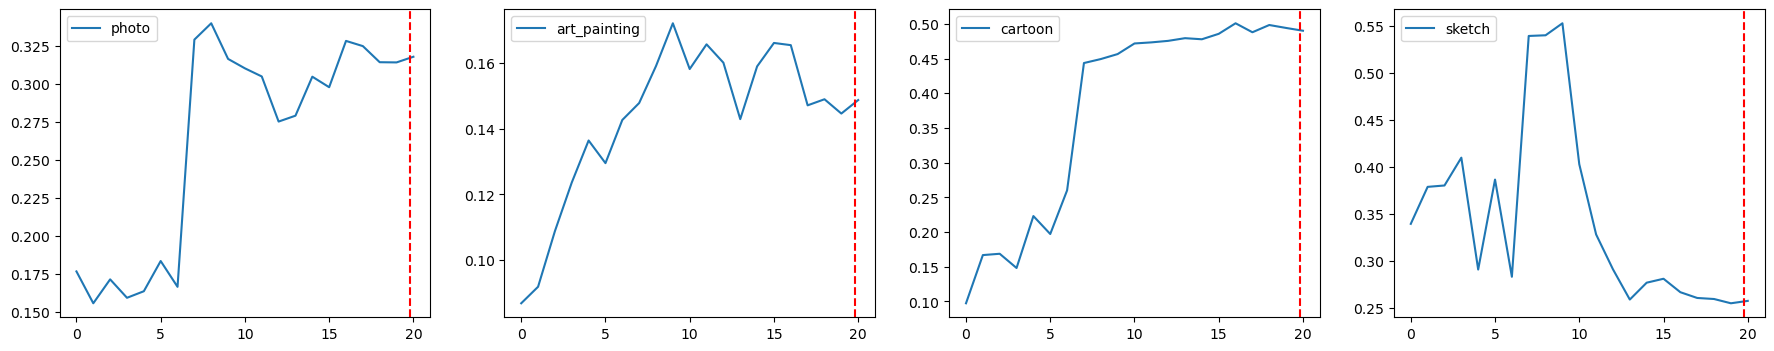

99
photo 0.31790004290004287
art_painting 0.14871439929579466
cartoon 0.4900030525030524
sketch 0.257291474972396


In [30]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

fig, ax = plt.subplots(1,4, figsize=(22, 4))

for idx, domain in enumerate(domain_list):
    ax[idx].plot(domain_test_trends[domain][metric], label = domain)
    print(domain, domain_test_trends[domain][metric])

    if "metric" in data["val_max_metric"].item():
        if "test_epoch" in data["args"].item():
            ax[idx].axvline(x=max_val_epoch / data["args"].item()["test_epoch"], color='r', linestyle='--')
        else:
            ax[idx].axvline(x=max_val_epoch / 5, color='r', linestyle='--')
    else:
        ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')

    ax[idx].legend()
plt.show()

print(max_val_epoch)
if "metric" in data["val_max_metric"].item():
    for domain in domain_list:
        print(domain, data["val_max_metric"].item()["metric"][domain][metric])
else:
    for domain in domain_list:
        print(domain, domain_test_trends[domain][metric][max_val_epoch])

In [31]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

tmp = []
for idx, domain in enumerate(domain_list):
    tmp.append(domain_test_trends[domain][metric])
tmp = pd.DataFrame(tmp, index=domain_list)
idx = tmp.mean(axis = 0).idxmax()
print(idx)
pd.concat([tmp, pd.DataFrame(tmp.mean(axis = 0), columns = ["avg"]).T])

9


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
photo,0.176836,0.155898,0.171616,0.159500,0.163809,0.183665,0.166705,0.329152,0.339896,0.316480,0.310284,0.304949,0.275305,0.279167,0.304799,0.297878,0.328309,0.324893,0.314309,0.314180,0.317900
art_painting,0.086829,0.091860,0.108805,0.123608,0.136403,0.129503,0.142655,0.147812,0.159078,0.172098,0.158161,0.165685,0.160094,0.142909,0.158960,0.166107,0.165438,0.147107,0.148961,0.144608,0.148714
cartoon,0.097354,0.166792,0.168687,0.148191,0.223000,0.197147,0.260050,0.443478,0.449201,0.456389,0.471671,0.473236,0.475427,0.479287,0.477711,0.485556,0.500753,0.487821,0.498259,0.494018,0.490003
sketch,0.339183,0.378507,0.379975,0.409546,0.290634,0.386269,0.282926,0.538929,0.539648,0.552410,0.402599,0.327922,0.290860,0.258697,0.276628,0.280826,0.266513,0.260395,0.259288,0.254747,0.257291
avg,0.175050,0.198264,0.207271,0.210211,0.203461,0.224146,0.213084,0.364843,0.371956,0.374344,0.335679,0.317948,0.300422,0.290015,0.304524,0.307592,0.315254,0.305054,0.305204,0.301888,0.303477


### 训练集loss下降趋势

(99,
 array([3.07819239, 2.80168365, 2.58554604, 2.50802224, 2.50610168,
        2.50435913, 2.50445951, 2.50406324, 2.50387861, 2.50369896,
        2.50357317, 2.50353026, 2.50344847, 2.50343249, 2.50338887,
        2.50334193, 2.50330451, 2.50327889, 2.5032464 , 2.50322257,
        2.50324306, 2.50317416, 2.50318028, 2.5031491 , 2.50315269,
        2.50311279, 2.50312992, 2.50310972, 2.50308059, 2.50307306,
        2.50303394, 2.50305657, 2.50304613, 2.50302125, 2.50302923,
        2.5029767 , 2.50301481, 2.50297174, 2.5029567 , 2.50295519,
        2.50291231, 2.50293552, 2.50290813, 2.50290474, 2.50289879,
        2.50284512, 2.50287212, 2.50284266, 2.50284173, 2.50281682,
        2.50279936, 2.5027794 , 2.50278866, 2.50279834, 2.50278534,
        2.50273716, 2.502758  , 2.50275902, 2.50267698, 2.50276672,
        2.50274286, 2.50269718, 2.50271062, 2.50267853, 2.5027348 ,
        2.50264772, 2.50270305, 2.50267961, 2.50266699, 2.50265474,
        2.50267117, 2.50261859, 2.50264646,

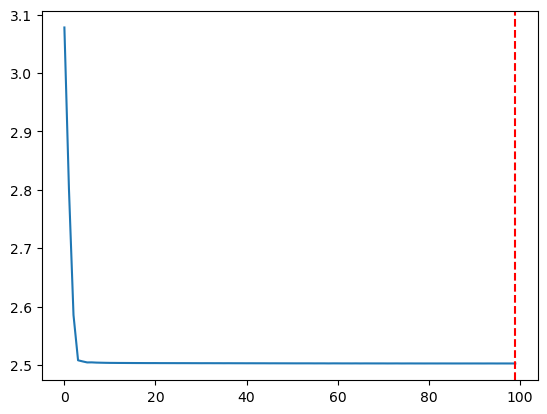

In [32]:
plt.plot(data["train_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
max_val_epoch, data["train_results_loss"].mean(axis=1)

### 训练过程中，模型在val 下降趋势

#### 验证集loss下降趋势

array([0.90499985, 0.90389221, 0.86542314, 0.89333985, 0.86833947,
       0.85898176, 0.8458587 , 0.84974481, 0.81601668, 0.78245554,
       0.7695596 , 0.7412236 , 0.73471242, 0.72153472, 0.7055659 ,
       0.69672549, 0.69052945, 0.68120852, 0.66827814, 0.6645932 ,
       0.65974712, 0.6483558 , 0.64043432, 0.6319852 , 0.62527376,
       0.62120281, 0.61436834, 0.61203958, 0.60065058, 0.60332399,
       0.59658048, 0.59202246, 1.50156917, 1.58686868, 1.53647598,
       1.49820721, 1.4600569 , 1.40486762, 1.35872047, 1.33628156,
       1.30271474, 1.26617638, 1.23357453, 1.21045294, 1.17595636,
       1.14961542, 1.12119419, 1.10893032, 1.09675016, 1.08185488,
       1.05648634, 1.03217653, 1.01457256, 1.01181699, 0.99669267,
       0.96475107, 0.96644079, 0.95826392, 0.95165563, 0.93335082,
       0.93383393, 0.92421548, 0.90872955, 0.90801489, 0.89712253,
       0.89051552, 0.8846865 , 0.88374181, 0.87902766, 0.86769399,
       0.8681678 , 0.86084918, 0.85152847, 0.85706701, 0.84694

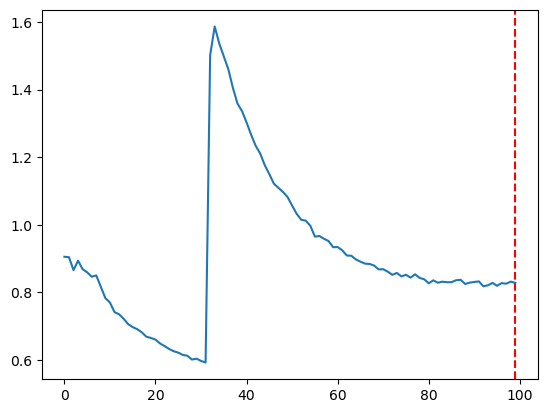

In [33]:
plt.plot(data["val_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

array([0.64380952, 0.67428571, 0.66031746, 0.68603175, 0.68634921,
       0.68793651, 0.67619048, 0.67809524, 0.67873016, 0.68920635,
       0.68063492, 0.66730159, 0.67079365, 0.67174603, 0.67174603,
       0.66126984, 0.67111111, 0.6768254 , 0.66634921, 0.66349206,
       0.65142857, 0.66412698, 0.65079365, 0.66126984, 0.6615873 ,
       0.65873016, 0.64857143, 0.65365079, 0.64920635, 0.64603175,
       0.60984127, 0.63301587, 0.67714286, 0.67587302, 0.68031746,
       0.67079365, 0.67777778, 0.67936508, 0.69301587, 0.69619048,
       0.68761905, 0.69079365, 0.68984127, 0.69111111, 0.69650794,
       0.6952381 , 0.69492063, 0.70444444, 0.6984127 , 0.70126984,
       0.69333333, 0.69365079, 0.69142857, 0.6847619 , 0.68825397,
       0.69555556, 0.68793651, 0.68444444, 0.68190476, 0.68222222,
       0.68095238, 0.68063492, 0.67587302, 0.67936508, 0.68412698,
       0.6784127 , 0.68825397, 0.68698413, 0.68761905, 0.67968254,
       0.67650794, 0.68222222, 0.68380952, 0.67650794, 0.67809

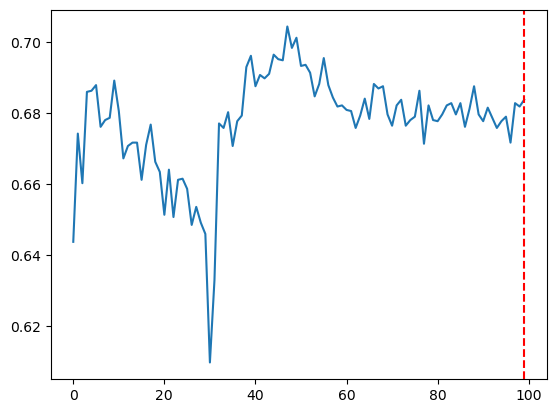

In [34]:
plt.plot(data[f"val_AUROC_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_AUROC_list"]

array([0.16307665, 0.20199829, 0.1784697 , 0.20464343, 0.20955773,
       0.21038519, 0.22378284, 0.23997208, 0.21013698, 0.22202333,
       0.21502701, 0.20832201, 0.20265167, 0.20776967, 0.19829608,
       0.1945768 , 0.21270704, 0.21213787, 0.19219615, 0.19060935,
       0.18277911, 0.19345143, 0.17974672, 0.19513952, 0.18764957,
       0.18980358, 0.189228  , 0.18761556, 0.18353994, 0.18198733,
       0.17172541, 0.19061905, 0.27277344, 0.26202552, 0.2677384 ,
       0.26227527, 0.26279041, 0.26263067, 0.27566492, 0.26548434,
       0.26682693, 0.26915042, 0.26762142, 0.26114801, 0.27407865,
       0.27406398, 0.26915962, 0.27821681, 0.2742538 , 0.26936254,
       0.27294985, 0.26883091, 0.25279385, 0.25807499, 0.27296648,
       0.28284384, 0.27273055, 0.26649093, 0.27620319, 0.27528127,
       0.27499793, 0.26693867, 0.26883118, 0.29637297, 0.29445393,
       0.29222414, 0.30336082, 0.30257505, 0.30214403, 0.28718188,
       0.29239121, 0.31257479, 0.30540049, 0.30707973, 0.28881

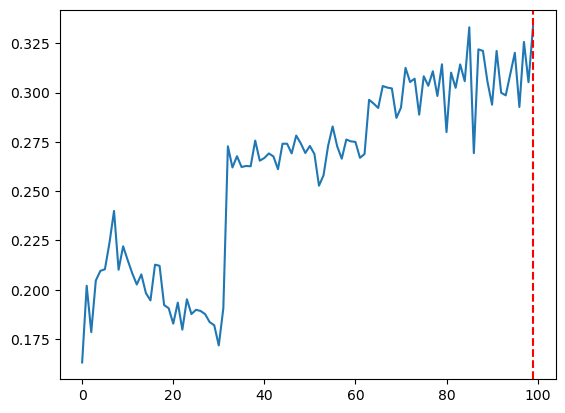

In [35]:
plt.plot(data[f"val_{metric}_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_{metric}_list"]

[0.01031861 0.00986189 0.00949696 0.00934688 0.00917589 0.00889556
 0.00859045 0.00828005 0.0079662  0.00765306 0.00736587 0.0070938
 0.00683776 0.00661373 0.00638972 0.00618926 0.00600847 0.00583344
 0.00566038 0.00550898 0.00537594 0.00524502 0.00510708 0.00500843
 0.00489555 0.00479314 0.00469561 0.00460274 0.00452434 0.00444835
 0.00438245 0.00431177 0.00491362 0.00593038 0.00590343 0.00570437
 0.00550825 0.00533853 0.00517144 0.0050371  0.00489726 0.00478354
 0.00467589 0.00456707 0.00447087 0.00439585 0.00431196 0.00424473
 0.00418566 0.00412577 0.00407178 0.00401756 0.00396933 0.00393042
 0.00388151 0.00384666 0.00380748 0.0037722  0.00373959 0.00371002
 0.00368021 0.00365266 0.00362572 0.00360471 0.00357866 0.0035607
 0.00353696 0.00352136 0.00350659 0.00349091 0.00347226 0.00345999
 0.00344578 0.00343317 0.00342307 0.00341681 0.00340258 0.00339746
 0.00338822 0.00338325 0.00337924 0.00336828 0.00336203 0.00335619
 0.00335788 0.0033543  0.00334439 0.00334595 0.00334227 0.003339

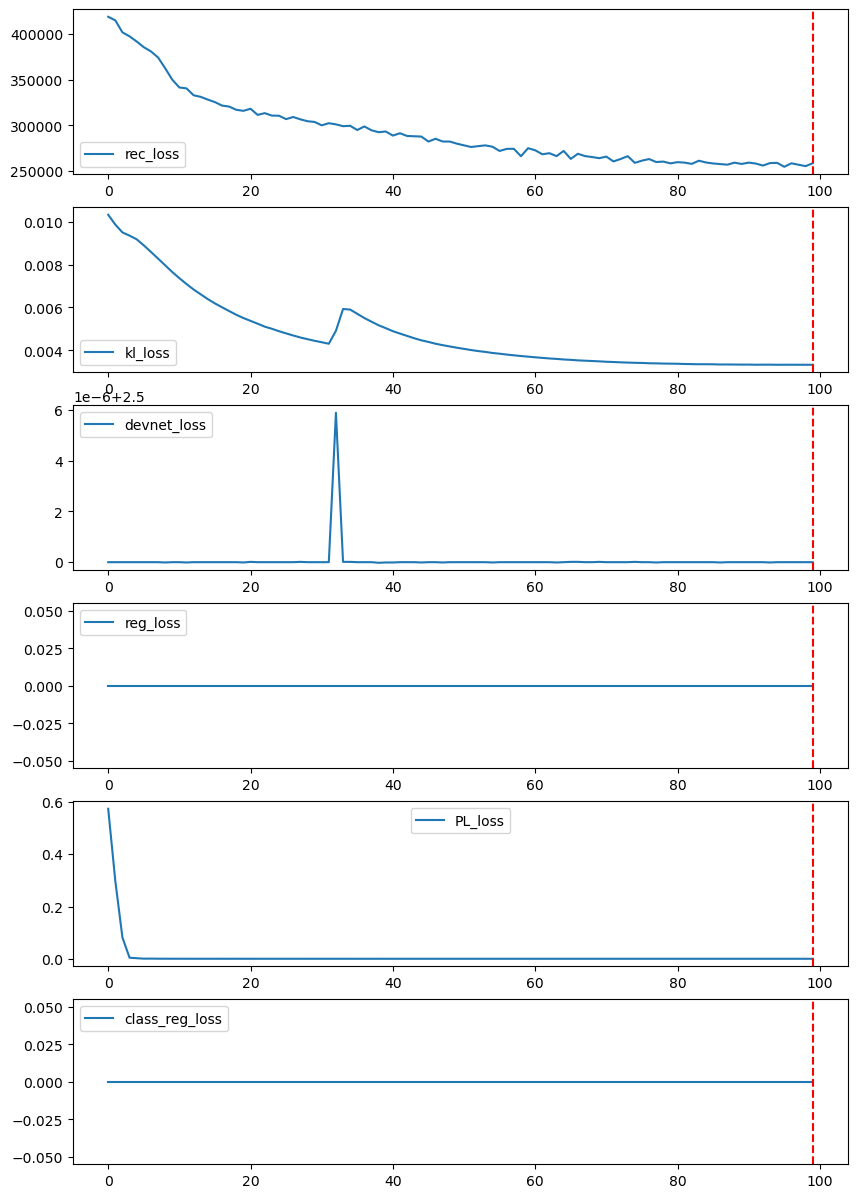

In [36]:
temp = data["sub_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(temp.shape[1],1,figsize=(10,2.5 * temp.shape[1]))
if dir_path.__contains__("method13"):
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
elif dir_path.__contains__("VAE_LPIPS_DEVNET"):
    loss_name_list = ["rec_loss", "kl_loss", "devnet_loss", "reg_loss", "PL_loss", "class_reg_loss"]
else:
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
for idx, label in enumerate(loss_name_list):
    ax[idx].plot(temp[0:,idx], label=label)
    ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
    ax[idx].legend()

# for i in range(5):
#     print(temp[0:,i])
print(temp[0:, 1])
plt.show()

In [37]:
import math
-(1/3)*math.log(1/3)*3
-(0.01)*math.log(0.01) * 2 + (-0.98*math.log(0.98))

0.1119020568909309

In [38]:
# data["sub_train_results_loss"].mean(axis=1)

In [39]:
if "pre_epochs" in para_name_list:
    temp = []
    for item in file_name.split(","):
        if re.match("epochs=|lr=|reg_lambda", item):
            pass
        else:
            temp.append(item)
    data = np.load(f'../experiment/{",".join(temp)}', allow_pickle=True)

In [40]:
plt.plot(data["pre_train_results_loss"].mean(axis=1))

KeyError: 'pre_train_results_loss is not a file in the archive'

In [ ]:
temp = data["sub_pre_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(2,1,figsize=(6, 6))
ax[0].plot(temp[0:,0], label="NCE_loss")
ax[1].plot(temp[0:,1], label="PL_loss") 
ax[0].legend()
ax[1].legend()
plt.show()

: 

In [ ]:
temp[0:,0]

: 

In [ ]:
temp[0:,1]

: 